In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Define column names
column_names = ['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot'
,'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations'
,'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate'
,'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count'
,'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate'
,'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','outcome','level']  # You need to fill this with the correct feature names

# Load the dataset
data = pd.read_csv('C:/Users/Jatin/Downloads/intrusion and anamoly detection using kdd dataset/NSL-KDD/KDDTrain+.txt', names=column_names)

df = pd.read_csv('C:/Users/Jatin/Downloads/intrusion and anamoly detection using kdd dataset/NSL-KDD/KDDTest+.txt', names=column_names)

cat_cols = ['is_host_login', 'protocol_type', 'service', 'flag', 'land', 'logged_in', 'is_guest_login', 'level', 'outcome']
# Display first few rows
print(data.head())

#print(df.head())


   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...    dst_host_same_srv_rate  \
0               0       0    0  ...                      0.17   
1               0       0    0  ...                      0.00   
2               0       0    0  ...                      0.10   
3               0       0    0  ...                      1.00   
4               0       0    0  ...                      1.00   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.03                         0.17   
1                    0.60                         0.88   
2 

In [2]:
# Encoding categorical features
label_encoders = {}
for column in ['protocol_type', 'service', 'flag', 'outcome']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Separate features and target
X = data.drop('outcome', axis=1)
y = data['outcome']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train RandomForest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [4]:
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       185
           1       1.00      0.33      0.50         9
           2       0.00      0.00      0.00         0
           3       1.00      0.82      0.90        11
           4       1.00      1.00      1.00         1
           5       0.99      0.99      0.99       733
           6       1.00      0.33      0.50         3
           7       0.00      0.00      0.00         0
           9       1.00      1.00      1.00      8228
          10       0.99      0.99      0.99       313
          11       1.00      1.00      1.00     13422
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      0.93      0.96        43
          15       1.00      0.99      1.00       573
          16       0.00      0.00      0.00         1
          17       1.00      0.99      1.00       738
          18       1.00    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_cla

In [5]:
import matplotlib.pyplot as plt

# Feature importance
feature_importance = model.feature_importances_

# Plotting
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(feature_importance)), X.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()


<Figure size 640x480 with 1 Axes>

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "C:\ProgramData\A

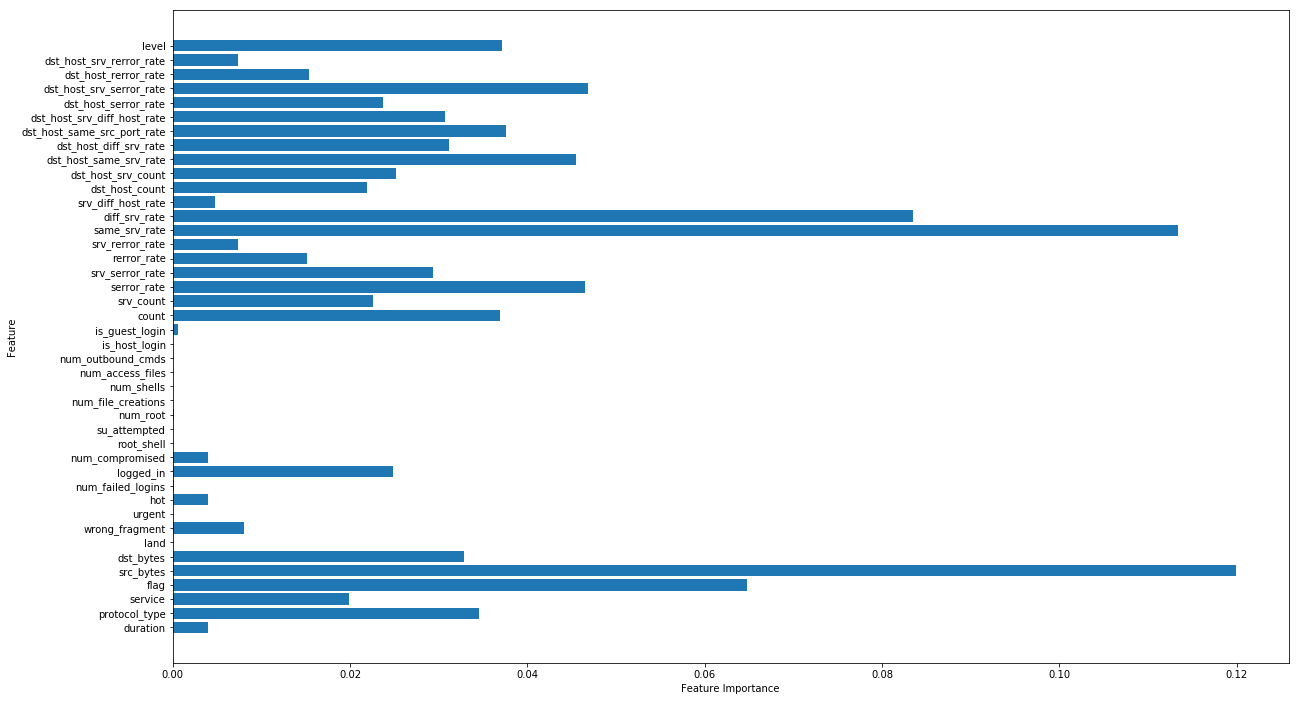

In [6]:
import matplotlib.pyplot as plt
import matplotlib

# This line is for Jupyter notebooks. In a Python script, you might not need it.
%matplotlib inline

# Set the graphical backend, if needed
matplotlib.use('Agg')

# Your existing code
feature_importance = model.feature_importances_

plt.figure(figsize=(20, 12))  # Optional: You can set the figure size
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(feature_importance)), X.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()


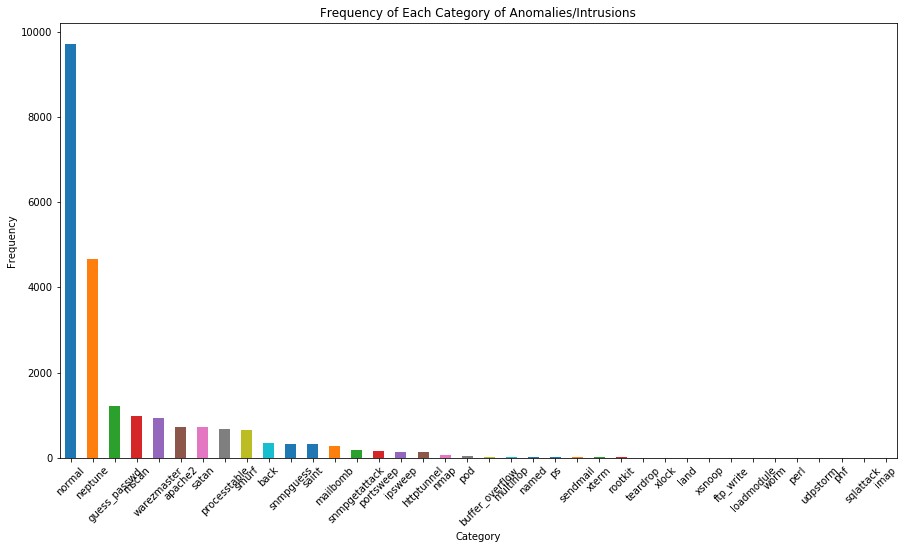

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame 'df'
# Replace this with your actual DataFrame
# df = pd.read_csv('your_data.csv')

# Count the occurrences of each category in the 'outcome' column
category_counts = df['outcome'].value_counts()

# Plotting
plt.figure(figsize=(15, 8))
category_counts.plot(kind='bar')
plt.title('Frequency of Each Category of Anomalies/Intrusions')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotating the x-labels for better readability
plt.show()
